https://bigdata-tools.com/state-space/

# 必要なライブラリーの読み込み

In [39]:
# ライブラリーの読み込み
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pmdarima as pm
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib import pyplot as plt
# グラフのスタイルとサイズ
#plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams.update({
    'font.size'      : 14,
    'axes.grid'      : True,
    'grid.linestyle' : '--',
    'figure.figsize' : [12, 6]
})


# 利用するデータ

In [40]:
# データセットの読み込み
url = 'https://www.salesanalytics.co.jp/591h' #データセットのあるURL
df=pd.read_csv(
    url,                         #読み込むデータのURL
    index_col='Month',           #変数「Month」をインデックスに設定
    parse_dates=True,            #インデックスを日付型に設定
)
df.head() #確認

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


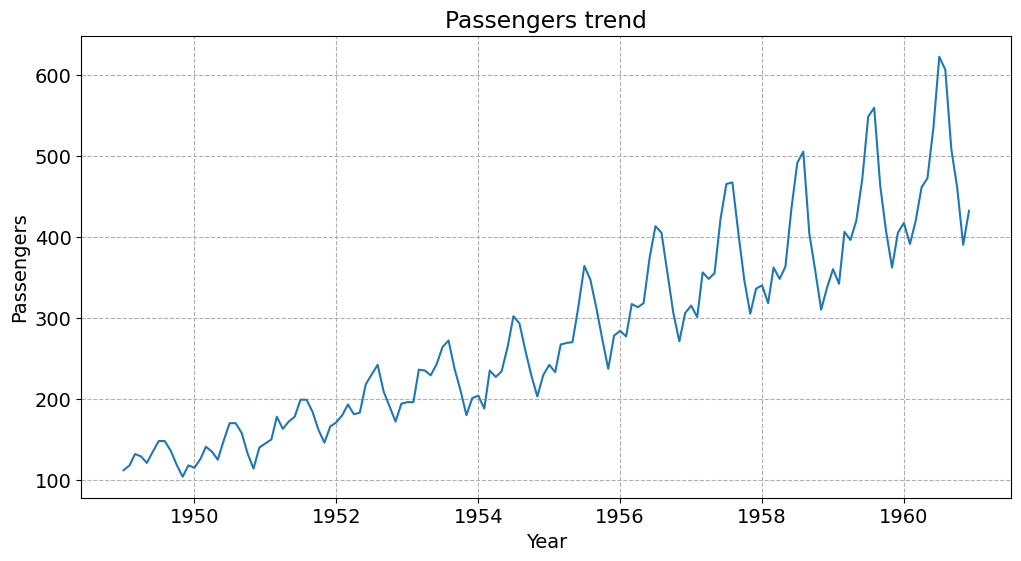

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(df)

ax1.set_title("Passengers trend")
ax1.set_xlabel("Year")
ax1.set_ylabel("Passengers")

plt.show()

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75424D+00    |proj g|=  6.94750D-03

At iterate    5    f=  4.31774D+00    |proj g|=  6.32581D-03

At iterate   10    f=  4.27576D+00    |proj g|=  4.10710D-02

At iterate   15    f=  4.02301D+00    |proj g|=  1.56305D-02

At iterate   20    f=  3.94750D+00    |proj g|=  1.90275D-02

At iterate   25    f=  3.93095D+00    |proj g|=  1.10339D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     52      1     0     0   

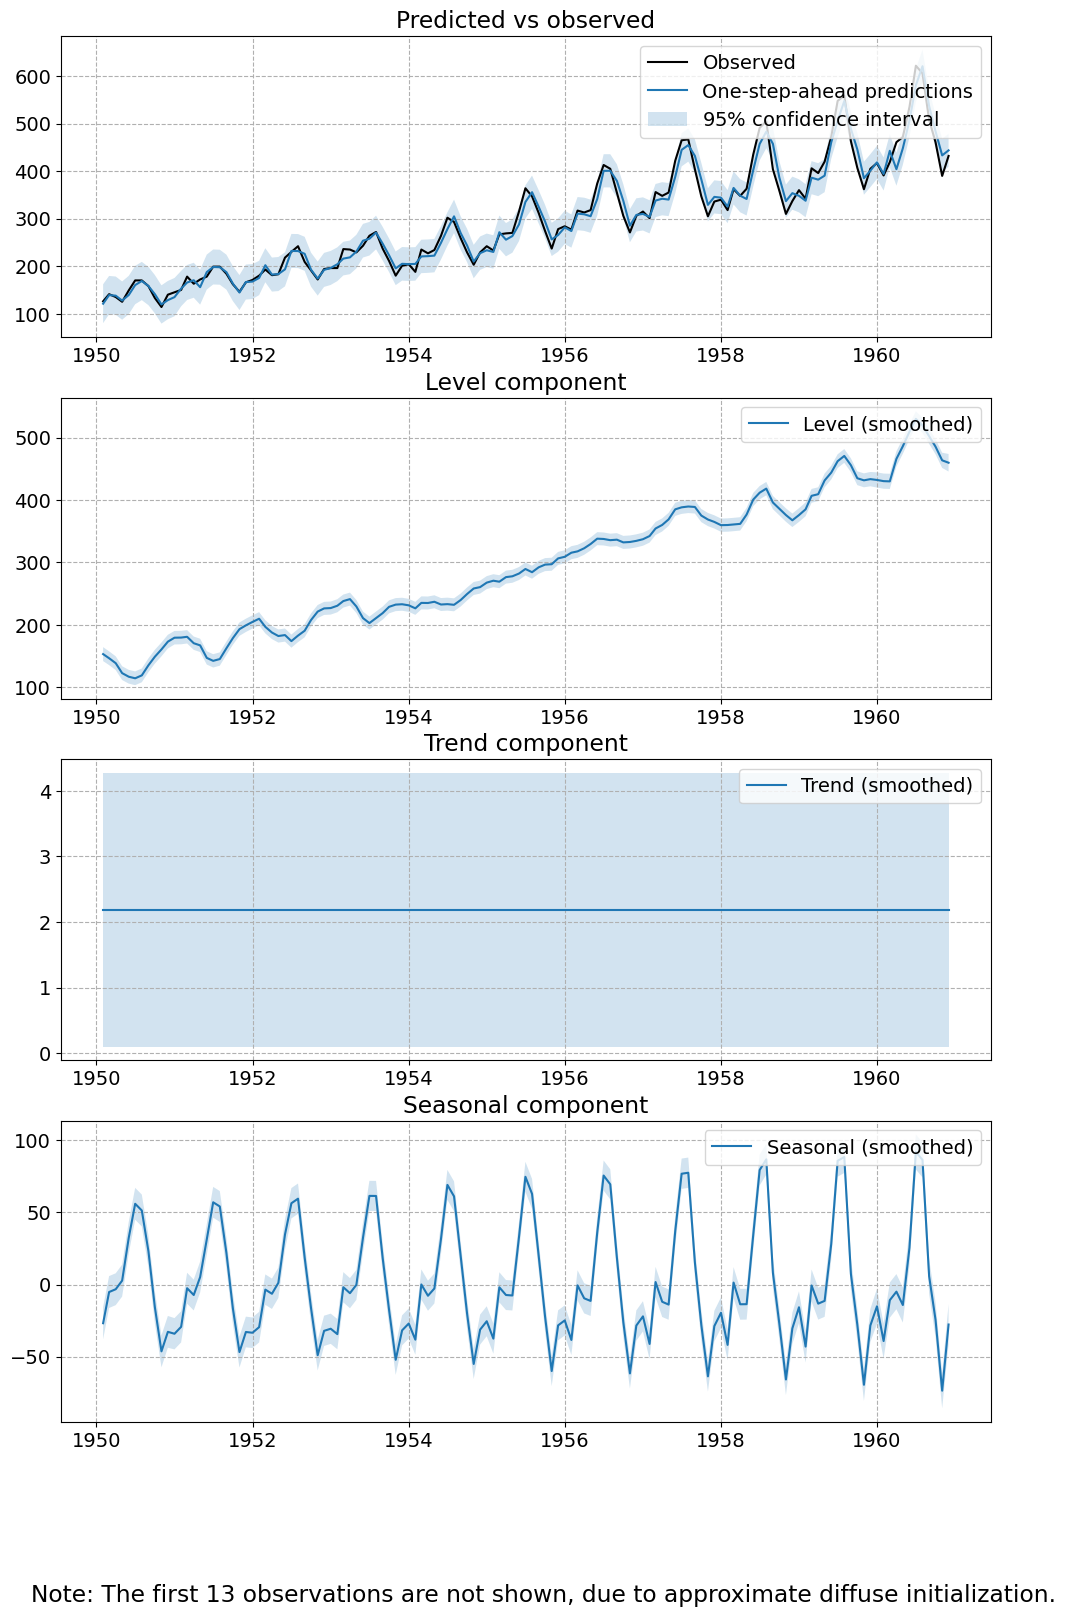

In [42]:
model = sm.tsa.UnobservedComponents(
    df,
    level='local linear trend',
    seasonal=12,
)

model_optimal = model.fit() #カルマンフィルタで最適化

# 推定結果をプロット
out = model_optimal.plot_components(figsize=(12, 18))

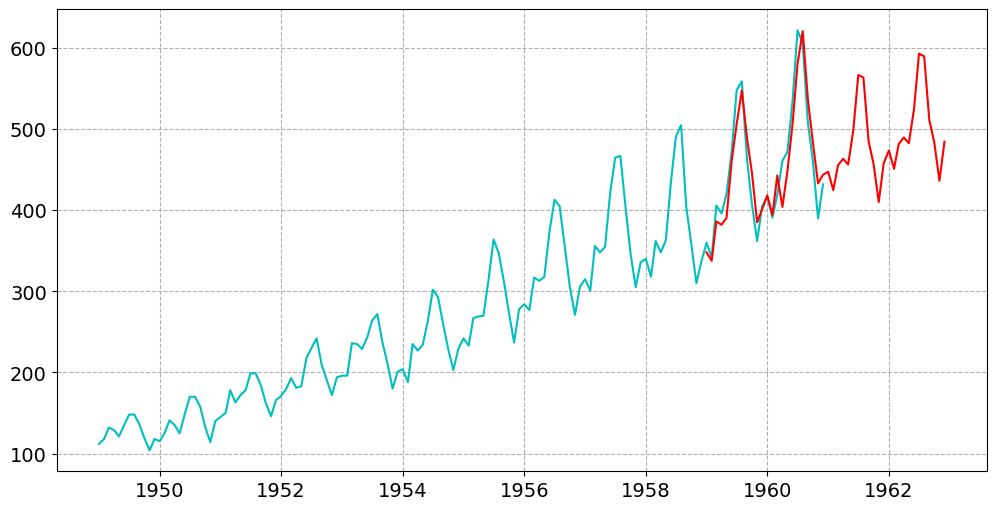

In [43]:
# 将来の予測
prediction = model_optimal.predict('1959-01-01', '1962-12-01')

# 観測値と予測値のプロット
plt.plot(df, color="c")
plt.plot(prediction, color="red")